In [2]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
import mapclassify

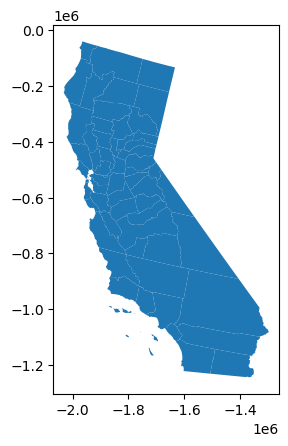

In [3]:
counties = gpd.read_file('../shapes/cb_2018_us_county_500k')
counties = counties[counties.STATEFP == '06']
counties['GEOID'] = counties['GEOID'].astype(int)
counties['coords'] = counties['geometry'].apply(lambda x: x.representative_point().coords[:])
counties['coords'] = [coords[0] for coords in counties['coords']]
counties = counties.to_crs(epsg=2163)
counties.plot()
show_labels=False
for idx, row in counties.iterrows():
    plt.annotate(text=row['NAME'], xy=row['coords'],
                 horizontalalignment='center')

In [4]:
state_df = gpd.read_file('../shapes/s_22mr22')
state_df = state_df[state_df.STATE.isin(['CA', 'OR', 'NV', 'AZ', 'UT', 'ID'])]
state_df = state_df.to_crs(epsg=2163)
state_df.head()

,STATE,NAME,FIPS,LON,LAT,geometry
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-930864.803 -830120.947, -930577.657..."
5,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-1715617.234 -1167833.849, -17..."
14,ID,Idaho,16,-114.65933,44.38907,"POLYGON ((-1162267.127 562750.724, -1161512.66..."
32,NV,Nevada,32,-116.65539,39.35648,"POLYGON ((-1216425.539 -222952.865, -1215846.1..."
36,OR,Oregon,41,-120.55232,43.93589,"MULTIPOLYGON (((-1965123.392 -38815.668, -1965..."


In [5]:
places = gpd.read_file('../shapes/tl_2019_06_place')
places = places[places.STATEFP == '06']
places = places.to_crs(epsg=2163)
places['clean_city'] = [x.lower() for x in places.NAME]
all_places = np.unique(places.clean_city)
places.head()

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,clean_city
0,06,66140,02411785,0666140,San Fernando,San Fernando city,25,C1,N,N,G4110,A,6148696,0,+34.2886519,-118.4362413,"POLYGON ((-1686605.942 -1005089.445, -1686409....",san fernando
1,06,14190,02409487,0614190,Cloverdale,Cloverdale city,25,C1,N,N,G4110,A,8107251,0,+38.7961433,-123.0150596,"POLYGON ((-1967862.491 -414706.204, -1967836.3...",cloverdale
2,06,16560,02410240,0616560,Cotati,Cotati city,25,C1,N,N,G4110,A,4869301,8380,+38.3284920,-122.7100491,"POLYGON ((-1955464.053 -471079.979, -1955452.6...",cotati
3,06,65042,02411779,0665042,San Buenaventura (Ventura),San Buenaventura (Ventura) city,25,C1,Y,N,G4110,A,56675175,26959120,+34.2677796,-119.2542062,"MULTIPOLYGON (((-1760509.540 -981385.922, -176...",san buenaventura (ventura)
4,06,30014,02410601,0630014,Glendora,Glendora city,25,C1,N,N,G4110,A,50527933,400123,+34.1449643,-117.8478035,"POLYGON ((-1638745.067 -1031325.901, -1638735....",glendora


In [7]:
arber_df = pd.read_csv('../data/TRU_from_ARBER.csv')
print(arber_df.shape)
arber_df.head()

(4113, 5)


,Motor Carrier,Company,City,County,State
0,893598.0,A&A LOGISTICS,BAKERSFIELD,Los Angeles,CA
1,2928916.0,OJEDA BROTHER'S TRUCKING,SN BERNRDNO,NaN,CA
2,2051212.0,"PARMAR TRUCKING, INC",FRESNO,NaN,CA
3,2015297.0,"1 CORINTHIANS 13 TRANSPORT, INC",RCH CUCAMONGA,NaN,CA
4,1925438.0,18 WHEELER TRANSPORTATION INC,N HOLLYWOOD,NaN,CA


In [8]:
def clean_city(x):
    x = x.lower()
    x = x.replace('rnch ', 'ranch ')
    if x.startswith('rch'): x = x.replace('rch ', 'ranch ')
    if x.startswith('s '):
        x = x.replace('s ', 'south ')
    if x.startswith('sn '):
        x = x.replace('sn ', 'san ')
    x = x.replace(' rnh', ' ranch')
    x = x.replace('rncho ', 'rancho ')
    x = x.replace('rcho ', 'rancho ')
    x = x.replace('mtn ', 'mountain ')
    x = x.replace(' cyn', ' canyon')
    x = x.replace(' cty', ' city')
    x = x.replace('hls', 'hills')
    x = x.replace(' hts', ' heights')
    x = x.replace(' hghts', ' heights')
    x = x.replace(' spgs', ' springs')
    x = x.replace(' vly', ' valley')
    x = x.replace(' vlg', ' village')
    x = x.replace(' grv', ' grove')
    x = x.replace(' pk', ' park')
    x = x.replace('w ', 'west ')
    x = x.replace('n hollywood', 'north hollywood')
    if x in ['van nuys','valley village', 'sunland', 'tujunga','north hollywood','sylmar','sun valley','studio city',
            'sherman oaks','san pedro','reseda','porter ranch','northridge','panorama city','pacoima','canoga park',
            'north hills','granada hills','encino','chatsworth', 'west hills', 'wilmington', 'winnetka', 'woodland hills']:
        x = 'los angeles' # Neighborhoods in LA
    if x in ['newhall','canyon country','valencia']:
        x = 'santa clarita' # neighborhood in santa clarita
    if x in ['san ysidro']:
        x = 'san diego' # neighborhood in san diego
    x = x.replace('n highlands', 'north highlands')
    x = x.replace('bernrdno', 'bernardino')
    x = x.replace('ranch cucamonga', 'rancho cucamonga')
    x = x.replace('carmel valley', 'carmel valley village')
    x = x.replace('city industry', 'industry')
    x = x.replace('city of industry', 'industry')
    x = x.replace('dsrt hot springs', 'desert hot springs')
    x = x.replace('hilmar', 'hilmar-irwin')
    x = x.replace('mc farland', 'mcfarland')
    x = x.replace('mcclellan', 'mcclellan park')
    x = x.replace('newbury park', 'thousand oaks') # mostly lies within this city
    x = x.replace('mira loma', 'jurupa valley') # consolidated into Jurupa Valley in 2011
    x = x.replace('quail valley', 'menifee') # consolidated in 2008
    if x == 'sun city': x = 'menifee' # consolidated in 2008
    if ('montrose' == x) or( 'la crescenta' == x):
        x = 'la crescenta-montrose'
    if x == 'paso robles':
        x = 'El Paso de Robles (Paso Robles)'.lower()
    if x == 'ranch palos vrd':
        x = 'rancho palos verdes'
    if x == 'rancho sta marg':
        x = 'rancho santa margarita'
    if x == 'san luis obisp':
        x = 'san luis obispo'
    if x == 'south san fran':
        x = 'south san francisco'
    if x == 'sunset beach':
        x = 'huntington beach'
    if x == 'ventura':
        x ='San Buenaventura (Ventura)'.lower()
    return x
arber_df['clean_city'] = arber_df.City.apply(clean_city)
match_found = arber_df['clean_city'].apply(lambda x: x in all_places)
print(np.mean(match_found))
arber_df.to_csv('../data/TRU_from_ARBER.csv', index=False)
no_match = arber_df[~match_found]
no_match.sort_values(by='clean_city')


0.9992706053975201


,Motor Carrier,Company,City,County,State,clean_city
3841,3206737.0,TRUE BLUE TRUCKING,BLUE JAY,NaN,CA,blue jay
1353,2723315.0,GABRIELA ALICJA NOWICKI,KITCHENER,NaN,CA,kitchener
3693,NaN,SYSCO SACRAMENTO INC.,PLEASANT GRV,Sutter,CA,pleasant grove


<AxesSubplot: >

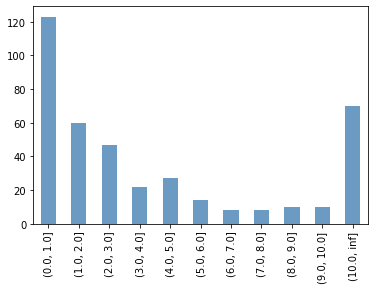

In [34]:
grouped = arber_df.groupby(['clean_city']).count().reset_index()
a = pd.cut(grouped.Company, np.r_[np.arange(11), [np.inf]])
a = a.value_counts().sort_index()
a.plot.bar(color='steelblue', alpha=.8)
# thing = np.unique(grouped['Company'], return_counts=True)[1]
# [(i, np.sum(thing[:i])) for i in range(len(thing))]

In [31]:
grouped.head()

,clean_city,Motor Carrier,Company,City,County,State
0,adelanto,2,2,2,2,2
1,alamo,0,1,1,1,1
2,alhambra,1,6,6,3,6
3,aliso viejo,0,1,1,1,1
4,altadena,0,1,1,0,1


In [148]:
def my_map_plot(merged, column, label, k=7, cmap='viridis'):
    fig, ax = plt.subplots(1, figsize=(6, 11))
    state_df[state_df.STATE == 'CA'].plot(ax=ax, color='white', edgecolor='black', linewidth=0.8)
    x_low,x_high = ax.get_xlim()
    y_low, y_high = ax.get_ylim()
    vmax = np.max(merged[column])
    vmin = np.min(merged[column])
#     k = 7
#     bounds = np.quantile(merged[column], np.linspace(0,1,k))
#     bounds = [round(x,2) for x in bounds]
# #     print(bounds)
#     k = 7
    ax = merged.plot(column=column, cmap=cmap, linewidth=0.1, ax= ax, edgecolor='0.8', 
               legend=False, scheme='FisherJenks', classification_kwds={'k':k})#classification_kwds={'bins':bounds[1:]})
    print(mapclassify.FisherJenks(merged[column], k=k).bins)
    bounds = [vmin]+list(mapclassify.FisherJenks(merged[column], k=k).bins)
    bounds = [round(x,2) for x in bounds]
    if show_labels:
        for idx, row in merged.iterrows():
            plt.annotate(text=row['NAME'], xy=row['coords'],
                         horizontalalignment='center')

    state_df[state_df.STATE != 'CA'].plot(ax=ax, color="#E2E2E2", edgecolor='#727475')
    counties.plot(ax=ax, color='none',edgecolor='black', linewidth=0.8)

    ax.set_xlim((x_low, x_high))
    ax.set_ylim((y_low, y_high))
    ax.axis('off')
    cax = ax.inset_axes([0.1, -0.06, 0.8, 0.05])
    cmap = mpl.colormaps[cmap]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,
                 cax=cax, orientation='horizontal', pad=0)  
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label(label=label, fontsize=13, labelpad=-75)
    return ax, plt

399
[  8.  26.  55.  94. 141. 200. 458.]


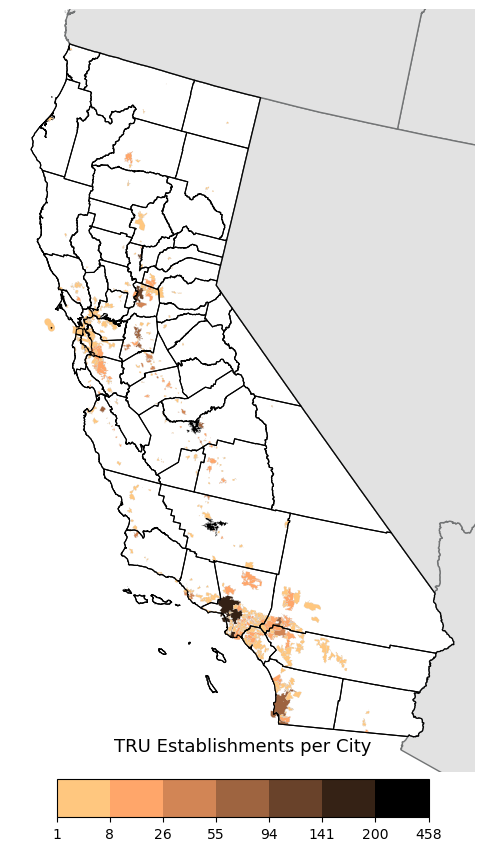

In [201]:
grouped = arber_df.groupby(['clean_city']).count().reset_index()
print(len(grouped.clean_city.unique()))
merged = places.merge(grouped, on='clean_city')
ax, fig = my_map_plot(merged, column='Company', label='TRU Establishments per City', cmap='copper_r')
fig.savefig('../outputs/ARBER_TRU.png', dpi=200, bbox_inches='tight')